# Exploratory Data Analysis

## Data Ingestion

***Importing libraries and dataset***

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import re
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
# Import data files 

# Contains health data of all the patients
df_data_all = pd.read_excel('../../Data/Dataset.xlsx', sheet_name='Dataset')

# Contains disease-wise segregation of patients
df_cases_segregated = pd.read_excel('../../Data/MasterfileComplication.xlsx', sheet_name ="Filtered")

***Visual Inspection of Dataset***

In [5]:
df_data_all.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,text-ObjectivCirculationOthers,text-ObjectivCirculations,text-ObjectivSkinAssessments,text-PriAssesmentCircOthers,text-PriAssesmentCirculations,text-PriAssesmentSkin,Group,IllnessType,MainDiagnosis,InjuryDetail
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,NaN,"['Rechts', 'Puls tastbar', 'stark', 'peripher']",NaN,Sickness,['Fieberhafter Infekt'],[False],['Verdachtsdiagnose: Erkrankung: Fieberhafter ...
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,['unauffällig'],NaN,NaN,NaN,NaN
2,00017976-caf1-4900-b7e9-90a197b713cf,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,['unauffällig'],Sickness,['Intoxikation Alkohol'],[False],['Verdachtsdiagnose:Erkrankung:Intoxikation Al...
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,['Stabil'],NaN,NaN,['Stabil'],NaN,NaN,Sickness,['Fieberhafter Infekt'],[True],NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,[7.0],...,['Stabil'],NaN,NaN,['Stabil'],NaN,NaN,Injured,NaN,[False],['Fraktur']


In [6]:
df_data_all.shape

(273183, 100)

*Insights*

- df_data_all contains the medical records of the patients such as body vitals data.
- Following data columns will be discarded ['IllnessType' , 'MainDiagnosis', 'InjuryDetail', 'Group'] as this data is recorded after main diagnosis of the patient. We want to predict the illness in a patient based on preliminary diagnosis at site.

In [7]:
# Dropping columns
df_data_all = df_data_all.drop(['IllnessType' , 'MainDiagnosis', 'InjuryDetail', 'Group'], axis='columns')

In [8]:
df_data_all.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,Text,Text-TrendDefibNotes,Comment-BloodgasVitals,text-ObjectivBleedings,text-ObjectivCirculationOthers,text-ObjectivCirculations,text-ObjectivSkinAssessments,text-PriAssesmentCircOthers,text-PriAssesmentCirculations,text-PriAssesmentSkin
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Rechts', 'Puls tastbar', 'stark', 'peripher']",NaN
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['unauffällig']
2,00017976-caf1-4900-b7e9-90a197b713cf,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['unauffällig']
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,NaN,NaN,['Stabil'],NaN,NaN,['Stabil'],NaN,NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,[7.0],...,NaN,NaN,NaN,NaN,['Stabil'],NaN,NaN,['Stabil'],NaN,NaN


In [9]:
df_cases_segregated.head()

,case,illness_type,injury_detail,Abdominal diseases,Cardiovascular diseases,CNS diseases,Gyn-obstetrics emergencies,Infections,Metabolic diseases,Other diseases,Psychiatric diseases,Respiratory diseases,No Disease,N/A
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,Fieberhafter Infekt,Verdachtsdiagnose: Erkrankung: Fieberhafter In...,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN,1
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,00017976-caf1-4900-b7e9-90a197b713cf,Intoxikation Alkohol,Verdachtsdiagnose:Erkrankung:Intoxikation Alko...,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN,2
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,Fieberhafter Infekt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN,1
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,Fraktur,NaN,NaN,NaN,NaN,NaN,NaN,Fraktur,NaN,NaN,NaN,1


In [10]:
df_cases_segregated.shape

(273183, 14)

In [11]:
# Dropping columns
df_cases_segregated = df_cases_segregated.drop(['illness_type', 'injury_detail','N/A'], axis='columns')

In [12]:
df_cases_segregated.head()

,case,Abdominal diseases,Cardiovascular diseases,CNS diseases,Gyn-obstetrics emergencies,Infections,Metabolic diseases,Other diseases,Psychiatric diseases,Respiratory diseases,No Disease
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00017976-caf1-4900-b7e9-90a197b713cf,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,NaN,NaN,NaN,NaN,NaN,Fraktur,NaN,NaN,NaN


In [13]:
# Merging dataframes
data = pd.merge(df_data_all,df_cases_segregated, on='case', how='outer')
data.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,Abdominal diseases,Cardiovascular diseases,CNS diseases,Gyn-obstetrics emergencies,Infections,Metabolic diseases,Other diseases,Psychiatric diseases,Respiratory diseases,No Disease
0,0000048e-5ef1-4dfb-9489-40632e1aa4a4,NaN,['-'],NaN,['2015-07-15T12:22:00+02:00'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00001d80-a442-4c7e-a065-506dbb4c762d,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00003d33-6d1b-4b27-b8cc-705affac16b0,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,Krampfanfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000621b-3904-49bd-8867-3f99fe7e8e3b,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000a562-072a-40ea-b4ab-4ffd3cd0e2d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Check

***Missing Values***

In [14]:
data.isna().sum()

case                         0
EstimatedBodyWeight     270456
Bmi                     157366
SizeCm                  270639
DateTime                239201
                         ...  
Metabolic diseases      265616
Other diseases          196461
Psychiatric diseases    261104
Respiratory diseases    256036
No Disease              273181
Length: 106, dtype: int64

- Almost every column contains huge number of missing values which needs to be addressed. 

***Duplicates***

In [15]:
data.duplicated().sum()

np.int64(0)

- No duplicate entries in the dataset. 

***Data types***

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273183 entries, 0 to 273182
Columns: 106 entries, case to No Disease
dtypes: object(106)
memory usage: 220.9+ MB


- Data is stored in the form of strings in all the columns except one. Column-wise data type needs to be changed as per the type of data stored in it.

## Visualization

***Case Count Per Disease***

In [17]:
# List of disease columns to check
disease_columns = ['Abdominal diseases', 'Cardiovascular diseases', 'CNS diseases', 'Gyn-obstetrics emergencies', 'Infections', 'Metabolic diseases', 'Other diseases', 'Psychiatric diseases', 'Respiratory diseases',]

In [18]:
# Create a new column that sets 1 if all selected columns have NaN, otherwise NaN
df_cases_segregated['No_Disease_Flag'] = df_cases_segregated[disease_columns].isna().all(axis=1).astype(int).replace(0, np.nan)

In [19]:
# Count per diagnosed disease
diagnosed_counts = df_cases_segregated.count(axis=0)

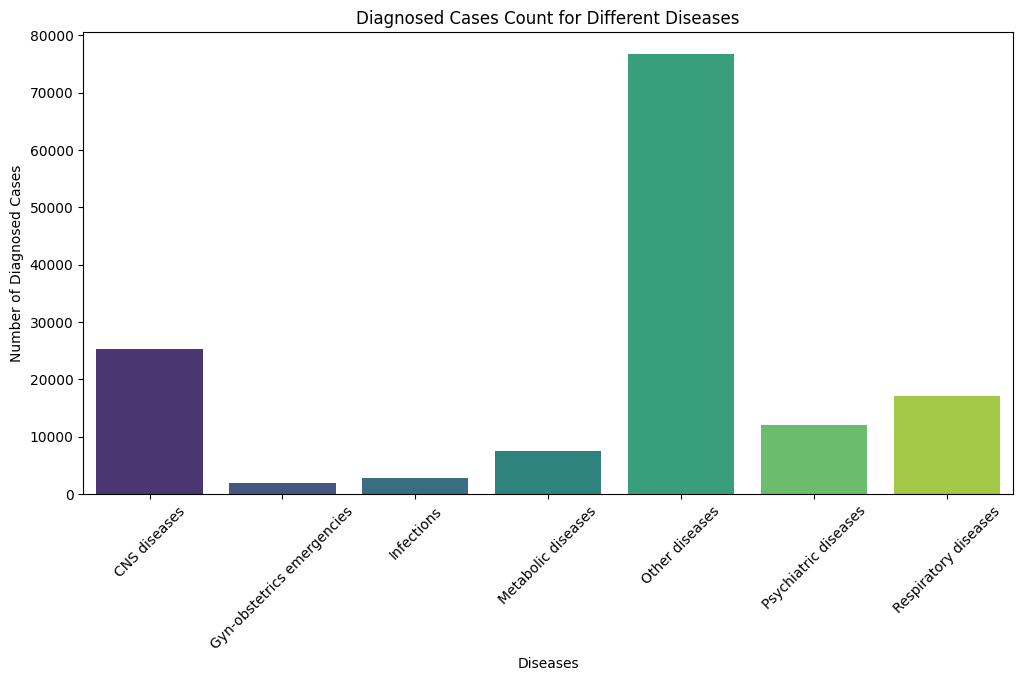

In [20]:
%matplotlib inline

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosed_counts.index[3:-2], y=diagnosed_counts.values[3:-2], palette='viridis')

# Labels and title
plt.xlabel("Diseases")
plt.ylabel("Number of Diagnosed Cases")
plt.title("Diagnosed Cases Count for Different Diseases")

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***CNS Diseases***

In [21]:
# CNS diseases data frame
CNS = df_cases_segregated['CNS diseases']
CNS.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: CNS diseases, dtype: object

In [22]:
CNS.shape

(273183,)

In [23]:
# Drop NA values
CNS = CNS.dropna()
CNS.shape

(25284,)

In [24]:
# Set of CNS diseases
CNS_diseases = CNS.unique()

In [25]:
# Count per CNS disease
CNS_disease_count = CNS.value_counts()

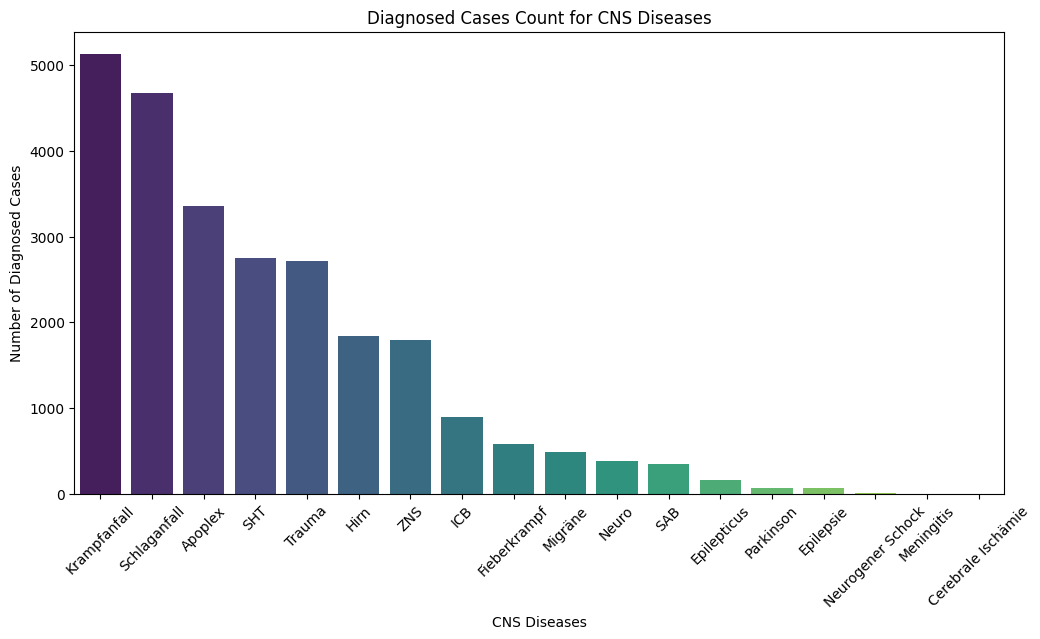

In [26]:
# CNS_diseases Vs Count Plot
%matplotlib inline

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=CNS_disease_count.index, y=CNS_disease_count , palette='viridis')

# Labels and title
plt.xlabel("CNS Diseases")
plt.ylabel("Number of Diagnosed Cases")
plt.title("Diagnosed Cases Count for CNS Diseases")

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***Abdominal diseases***

In [27]:
# Abdominal diseases dataframe
abdominal_diseases = df_cases_segregated['Abdominal diseases']
abdominal_diseases.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Abdominal diseases, dtype: object

In [28]:
abdominal_diseases.shape

(273183,)

In [29]:
abdominal_diseases = abdominal_diseases.dropna()

In [30]:
abdominal_diseases.shape

(14609,)

In [31]:
# Unique Abdominal Diseases
abdominal_diseases_unique = abdominal_diseases.unique()
abdominal_diseases_unique

array(['GI Blutung', 'Appendizitis', 'nieren', 'Nierenkolik', 'Abdom',
       'Gallenkolik', 'Harnverhalt', 'Pankreatitis', 'Durchfall',
       'Darmverschluss', 'Peritonitis', 'Leber', 'Leberzirrhose',
       'Reflux', 'Hoden', 'Mesinterialinfarkt'], dtype=object)

In [32]:
# Count per unique disease
abdominal_diseases_count = abdominal_diseases.value_counts()
abdominal_diseases_count

Abdominal diseases
Abdom                 7659
GI Blutung            1907
Nierenkolik           1470
Gallenkolik            704
Harnverhalt            684
Appendizitis           492
Pankreatitis           462
nieren                 435
Darmverschluss         390
Durchfall              151
Leber                   62
Hoden                   60
Reflux                  46
Leberzirrhose           41
Peritonitis             37
Mesinterialinfarkt       9
Name: count, dtype: int64

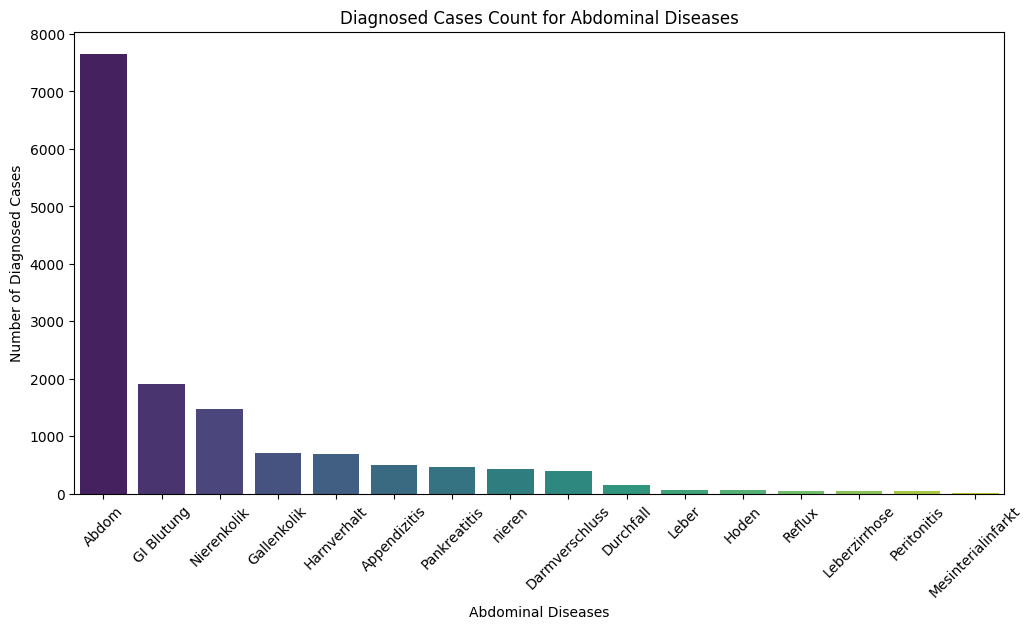

In [33]:
# Abdominal_diseases Vs Count Plot
%matplotlib inline

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=abdominal_diseases_count.index, y=abdominal_diseases_count , palette='viridis')

# Labels and title
plt.xlabel("Abdominal Diseases")
plt.ylabel("Number of Diagnosed Cases")
plt.title("Diagnosed Cases Count for Abdominal Diseases")

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***Cardiovascular Diseases***

In [34]:
df_cases_segregated.head()

,case,Abdominal diseases,Cardiovascular diseases,CNS diseases,Gyn-obstetrics emergencies,Infections,Metabolic diseases,Other diseases,Psychiatric diseases,Respiratory diseases,No Disease,No_Disease_Flag
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN,NaN
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,00017976-caf1-4900-b7e9-90a197b713cf,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN,NaN
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN,NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,NaN,NaN,NaN,NaN,NaN,Fraktur,NaN,NaN,NaN,NaN


In [35]:
# Cardiovascular data frame
cardiovascular = df_cases_segregated['Cardiovascular diseases']
cardiovascular.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Cardiovascular diseases, dtype: object

In [36]:
cardiovascular.shape

(273183,)

In [37]:
# Drop NA
cardiovascular = cardiovascular.dropna() 

In [38]:
cardiovascular.shape

(44710,)

In [39]:
# Unique Cardiovascular diseases
cardiovascular_diseases = cardiovascular.unique()


In [40]:
# Disease count
cardiovascular_diseases_count = cardiovascular.value_counts()


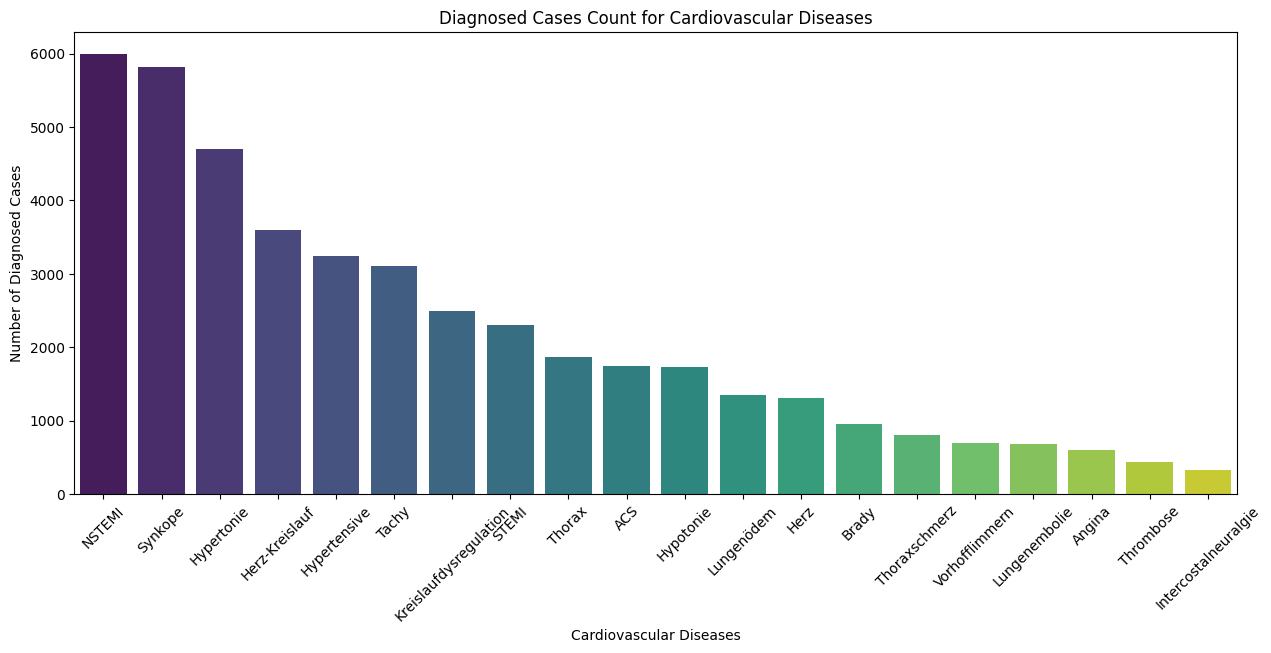

In [41]:
# Cardiovascular Diseases Vs Count Plot
%matplotlib inline

# Plot the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=cardiovascular_diseases_count.index[:20], y=cardiovascular_diseases_count[:20] , palette='viridis')

# Labels and title
plt.xlabel("Cardiovascular Diseases")
plt.ylabel("Number of Diagnosed Cases")
plt.title("Diagnosed Cases Count for Cardiovascular Diseases")

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

***Gyn-obstetrics emergencies***

In [42]:
# Gyn-Obstetrics Data Frame
gyn_obstetrics = df_cases_segregated['Gyn-obstetrics emergencies']

In [43]:
# Drop NA
gyn_obstetrics = gyn_obstetrics.dropna()

In [44]:
gyn_obstetrics.shape

(1966,)

In [45]:
# Diseases
gyn_obstetrics_diseases = gyn_obstetrics.unique()

In [46]:
# Disease count
gyn_obstetrics_count = gyn_obstetrics.value_counts()

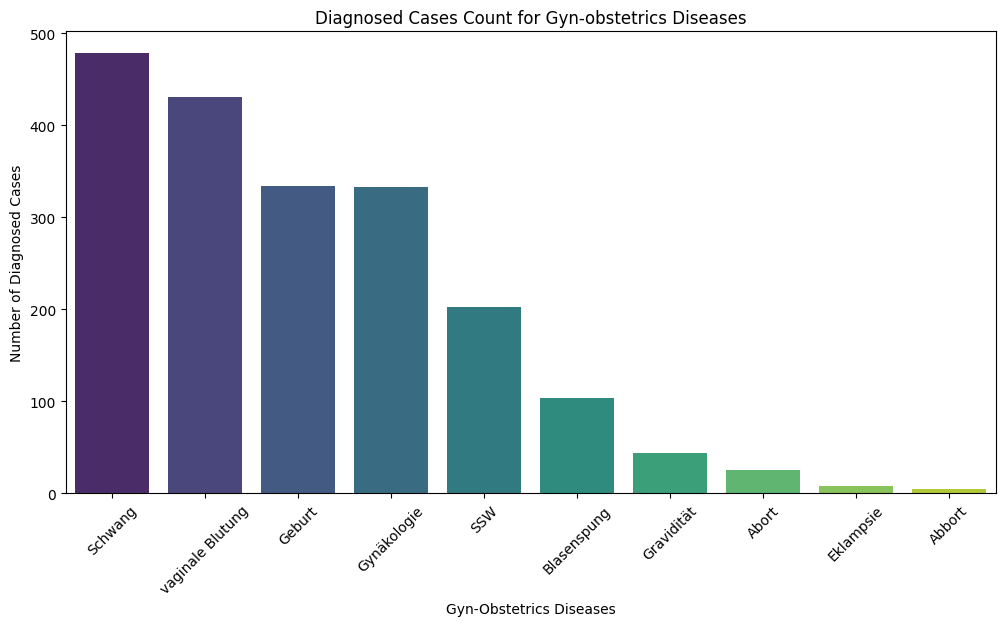

In [47]:
# Gyn-obstetrics disease Vs Count

# Plot size
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 10
sns.barplot(x=gyn_obstetrics_count.index, y=gyn_obstetrics_count, palette='viridis')

# Label and Title
plt.xlabel('Gyn-Obstetrics Diseases')
plt.ylabel('Number of Diagnosed Cases')
plt.title('Diagnosed Cases Count for Gyn-obstetrics Diseases')

# Rotate x-label for readability
plt.xticks(rotation=45)

plt.show()

***Respiratory diseases***

In [48]:
# Respiratory Data frame
respiratory = df_cases_segregated['Respiratory diseases']

In [49]:
# Drop NA
respiratory = respiratory.dropna()

In [50]:
# Diseases
respiratory_diseases = respiratory.unique()

In [ ]:
# Disease count
respiratory_count = respiratory.value_counts()

Respiratory diseases
COPD                           4344
Bronchitis                     3331
Hyperventilation               2141
Lungen                         1968
Dyspnoe                        1226
Aspiration                      947
Atemweg                         898
Asthma                          878
Covid                           428
Atem                            309
Pneumonie                       280
Luft                            143
Corona                          115
Pneumothorax                     94
Respiratorische Insuffiziez      19
Epiglottitis                     15
Pseudokrupp                       6
Respiratory                       3
Hämoptyse                         2
Name: count, dtype: int64

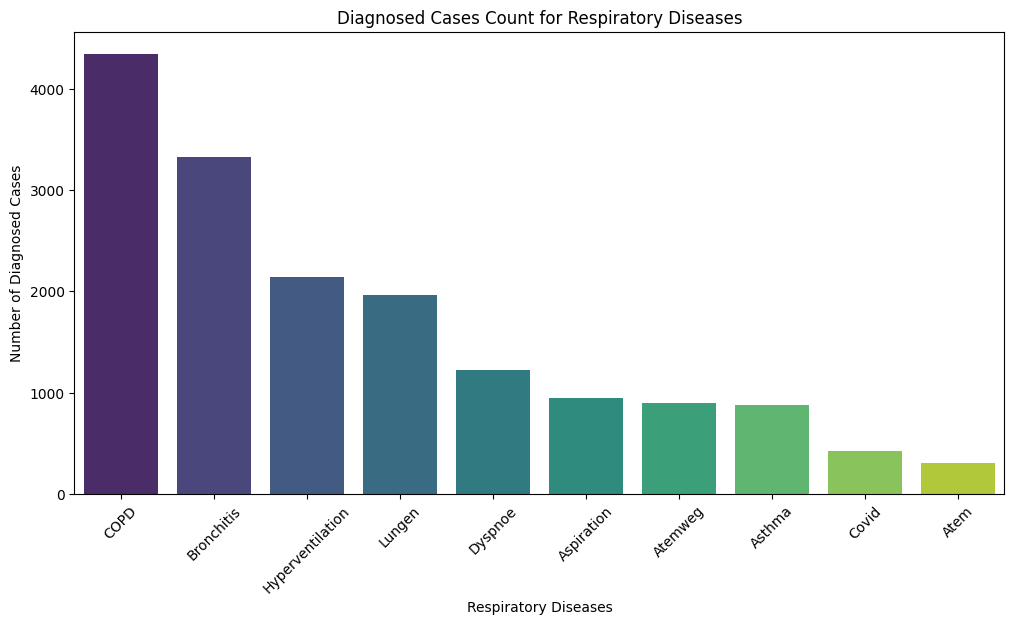

In [52]:
# Respiratory Diseases Vs Count

plt.figure(figsize=(12,6))

sns.barplot(x=respiratory_count.index[:10], y=respiratory_count[:10], palette='viridis')

# Label and Title
plt.xlabel('Respiratory Diseases')
plt.ylabel("Number of Diagnosed Cases")
plt.title('Diagnosed Cases Count for Respiratory Diseases')
plt.xticks(rotation = 45)

plt.show()

***Other Diseases***

In [53]:
# Other diseases data frame
other = df_cases_segregated['Other diseases']

In [54]:
# Drop NA
other = other.dropna()

In [55]:
# Diseases
other_diseases = other.unique()

In [56]:
# Disease Count
other_count = other.value_counts()
other_count

Other diseases
Blutung                      20047
Sonstige Erkrankung          12832
Verletzung                    9808
Intox                         5532
Infekt                        3711
AZ-Verschlechterung           2943
Fieber                        2844
Schwindel                     2260
Fraktur                       2111
Wund                          2042
Prellung                      1548
Schmerz                       1548
Schmerzen                     1475
Lumbago                        990
Anaphylaxie                    980
Nasenbluten                    696
Schädel-Hirn                   693
Bandscheibenvorfall            612
Blockade                       483
Sturz                          447
Entzündung                     363
Allerg                         302
Septischer                     259
Grippaler                      238
Verschlechterung               205
Exitus                         205
BWS                            155
Tod                            123
Entla

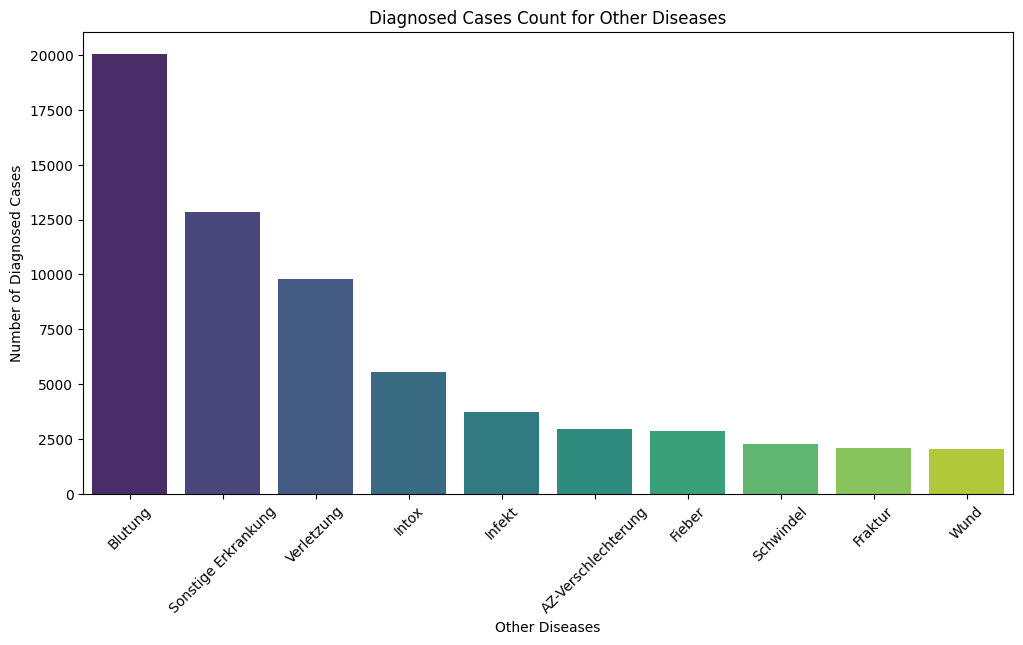

In [57]:
# Other Diseases Vs Count Plot

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 10
sns.barplot(x=other_count.index[:10], y=other_count[:10], palette='viridis')

# Labels and Title
plt.xlabel('Other Diseases')
plt.ylabel('Number of Diagnosed Cases')
plt.title('Diagnosed Cases Count for Other Diseases')
plt.xticks(rotation = 45)

plt.show()

***Psychiatric Diseases***

In [58]:
# Psychiatric Data frame
psychiatric = df_cases_segregated['Psychiatric diseases']

In [59]:
# Drop NA
psychiatric = psychiatric.dropna()
psychiatric

2            Alkohol
12           Alkohol
47            Drogen
67        Depression
97             Psych
             ...    
273032      Psychose
273036        Drogen
273066         Psych
273085         Psych
273163         Psych
Name: Psychiatric diseases, Length: 12079, dtype: object

In [60]:
psychiatric.shape

(12079,)

In [61]:
# Psychiatric Diseases
psychiatric_diseases = psychiatric.unique()

In [62]:
# Disease Count
psychiatric_diseases_count = psychiatric.value_counts()

In [63]:
psychiatric_diseases_count

Psychiatric diseases
Alkohol                  4067
Psych                    3777
Suizidalität              934
Psychatrie                921
Drogen                    815
Depression                653
Psychose                  468
Panik                     240
Alk                       124
Manie                      54
Akute Fremdgefährdung      26
Name: count, dtype: int64

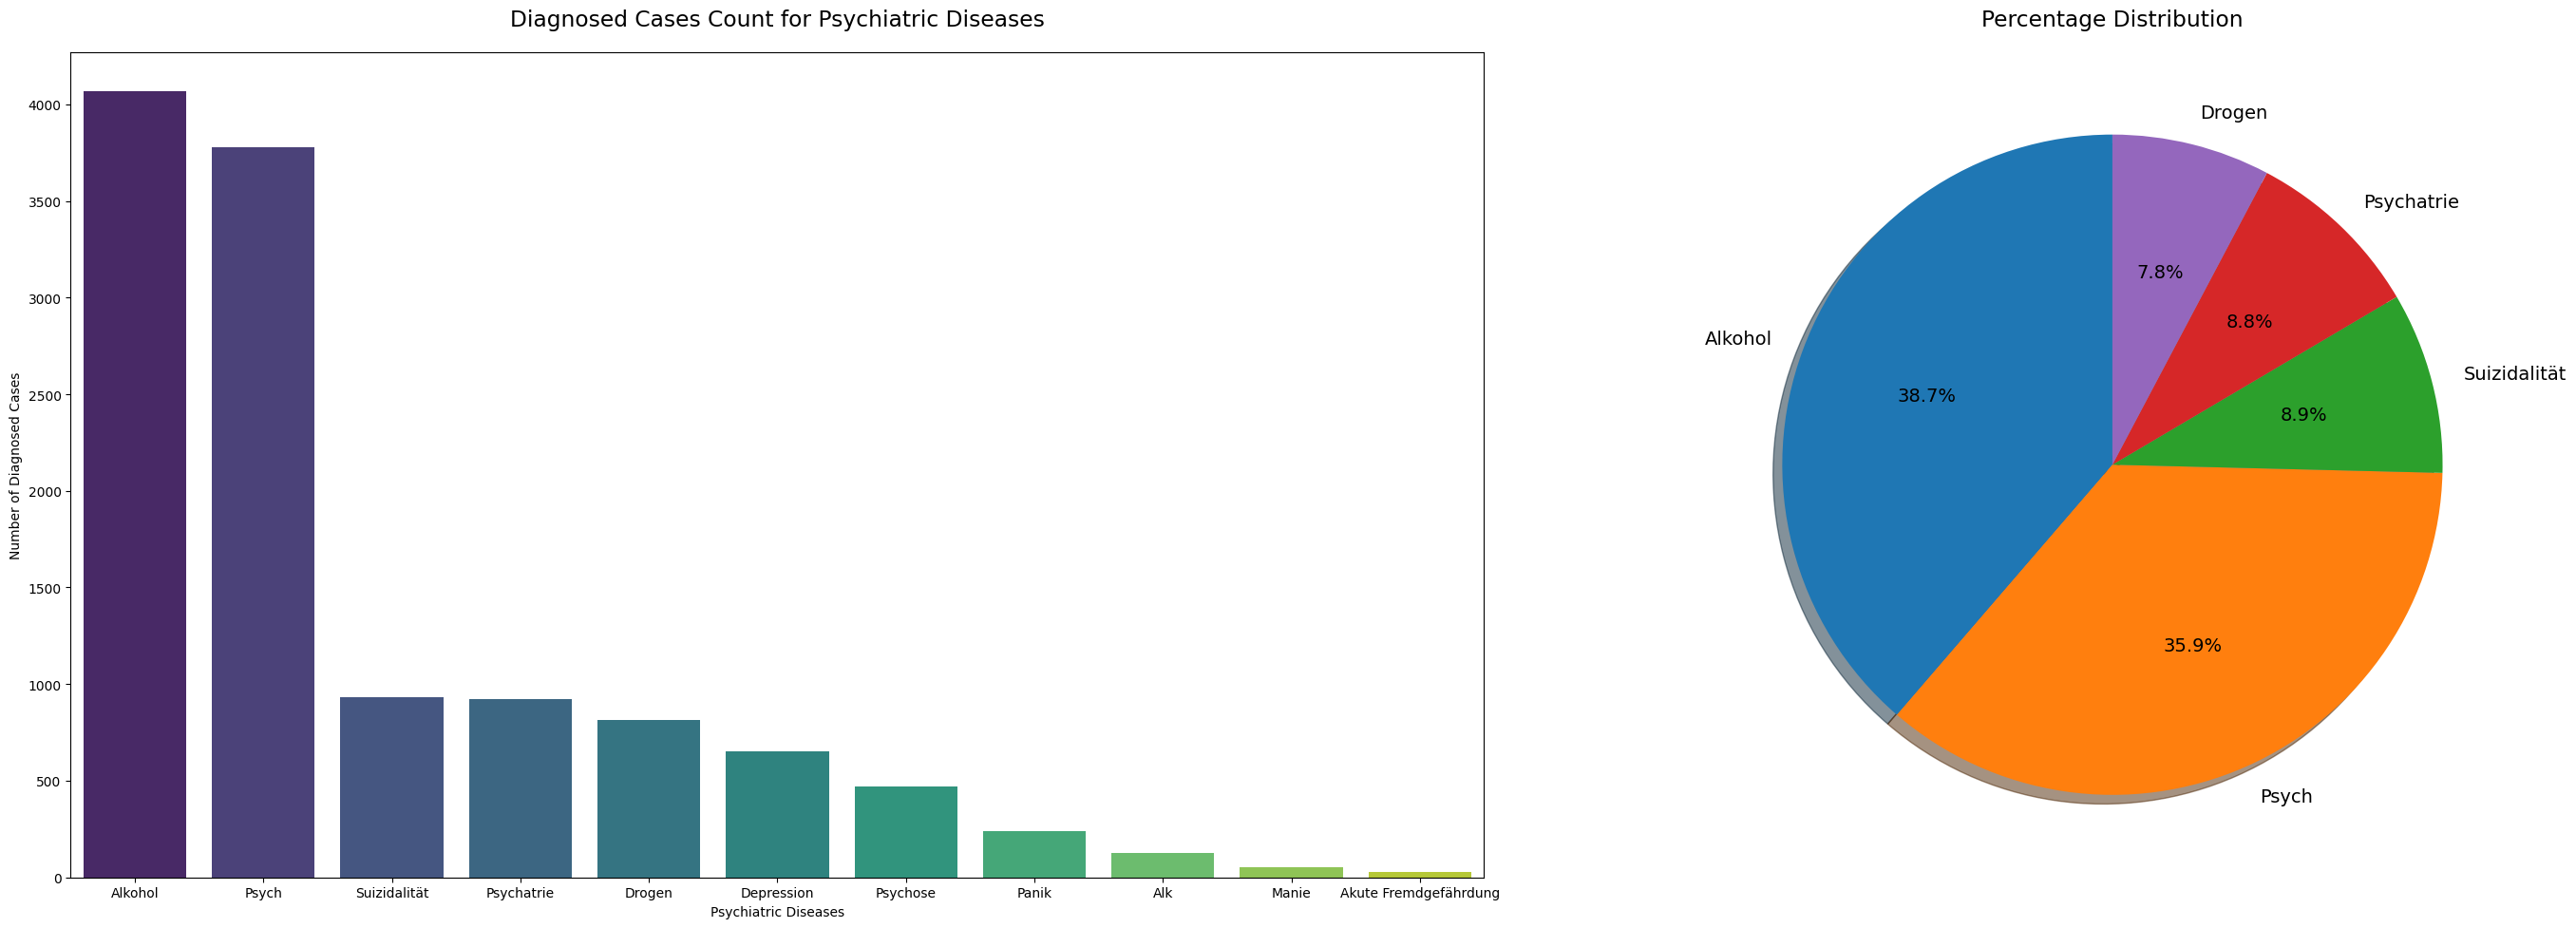

In [64]:
# Psychiatric Diseases Vs Count Plot

# Set figure parameters
f, ax = plt.subplots(1,2, figsize = (30,10))
plt.rcParams['font.size'] = 14

# Bar Plot
sns.barplot(x= psychiatric_diseases_count.index, y= psychiatric_diseases_count, ax=ax[0], palette='viridis')
ax[0].set_xlabel("Psychiatric Diseases")
ax[0].set_ylabel("Number of Diagnosed Cases")
ax[0].set_title("Diagnosed Cases Count for Psychiatric Diseases", pad = 20)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Pie Chart
disease_count = psychiatric_diseases_count[:5]
ax[1].pie(disease_count, 
          labels=disease_count.index,
          autopct='%1.1f%%',
          shadow=True,
          startangle=90)
ax[1].set_title('Percentage Distribution', pad=20)

plt.tight_layout()
# Show the plot
plt.show()

## Data Segregation

In [65]:
data_psy = data[~data['Psychiatric diseases'].isna()]

In [66]:
data_psy

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,Abdominal diseases,Cardiovascular diseases,CNS diseases,Gyn-obstetrics emergencies,Infections,Metabolic diseases,Other diseases,Psychiatric diseases,Respiratory diseases,No Disease
8,00017976-caf1-4900-b7e9-90a197b713cf,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN
9,00017e08-43f1-4ae8-8253-0fa4e81edc5b,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sonstige Erkrankung,Psychatrie,NaN,NaN
54,000b1628-4658-480c-9d44-24866a6e14bd,NaN,['-'],NaN,['2018-02-18T00:46:00+01:00'],NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN
125,001adedd-04e8-44cc-8335-8222e6e911b3,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Drogen,NaN,NaN
151,00213c8d-98e7-4533-a487-f9bec04989c9,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Psychose,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273051,ffdcb672-c11e-4d08-8aaa-a87b6fa92b42,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Psychose,NaN,NaN
273083,ffe74ba4-589c-4168-a59a-6cb2e937df97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sonstige Erkrankung,Alkohol,Asthma,NaN
273096,ffea081b-0e6a-4cad-9b3e-032fff8542d6,NaN,NaN,NaN,['2020-08-03T20:03:33+02:00'],NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN
273111,ffed2560-1c6e-4474-80db-76f33b51d20c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depression,NaN,NaN
